# Hypothesis Testing

## 許sir


## [說明]
在iris資料集中，我們可能知道當花萼和花瓣的大小似乎是相關的: 越大的花萼，花瓣就越大! 但是，在不同的種類之间是否有额外的系统效應?

## [標準開始動作]. 如果你用python的目標是科學計算或數值分析，基本是引⼊三個套件

In [2]:
%matplotlib inline 
##將後續畫圖的結果直接顯現在網頁中

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  

In [43]:
import seaborn as sns #加入seaborn套件

## [Part 1]. 敘述性統計

鳶尾花 (Iris) 數據庫是很有名的資料, 就是試著以一朵鳶尾花花萼、花瓣的大小來分出是哪個的大小來分出是哪個亞種的鳶尾花。
該數據集測量了所有150個樣本的4個特徵，分別是：

- sepal length（花萼長度）
- sepal width（花萼寬度）
- petal length（花瓣長度）
- petal width（花瓣寬度）

In [9]:
data = pd.read_csv('iris.csv')


In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
data.describe() #基本統計量

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


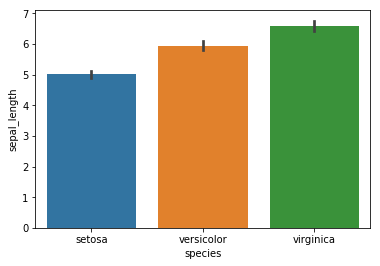

In [19]:
sns.barplot(x = 'species', y ='sepal_length', data = data)

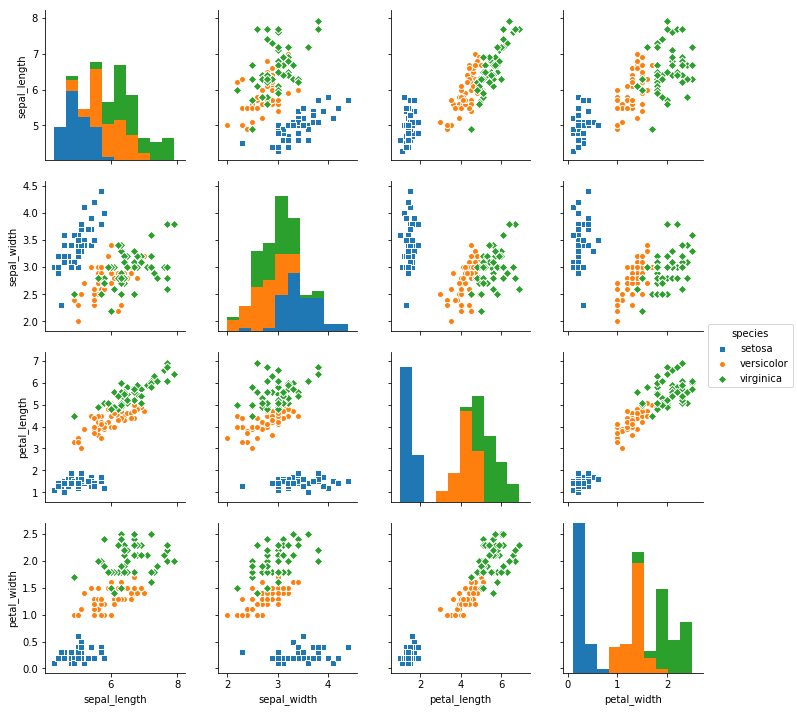

In [21]:
sns.pairplot(data ,hue ='species', markers=["s","o", "D"]) # o是圓圈，s是方塊，D是菱形

### 好像真的是"越大的花萼，花瓣就越大"。但有顯著的差異嗎?

## [Part 2]. 多元迴歸分析

- sepal length（花萼長度）
- sepal width（花萼寬度）
- petal length（花瓣長度）
- petal width（花瓣寬度）

In [31]:
from scipy import stats #載入統計套件
from statsmodels.formula.api import ols #使用OLS法

## 2-1. 花萼與花瓣之間的關係

### [我們要檢定的是]
- ### H1a: 花萼長度與花瓣長度有顯著的正向關係
- ### H1b: 花萼寬度與花瓣寬度有顯著的正向關係

- ### H2a: 花萼長度與花瓣寬度有顯著的正向關係
- ### H2b: 花萼寬度與花瓣長度有顯著的正向關係

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           1.04e-47
Time:                        21:38:32   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.1014      0.507    -14.016   

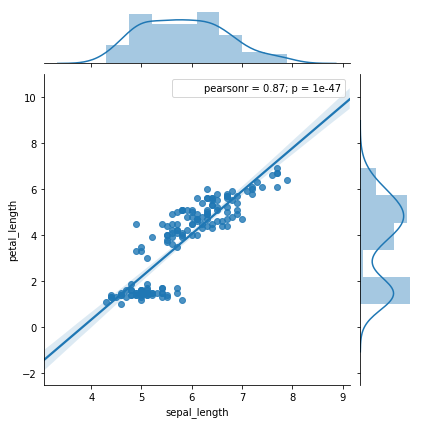

In [33]:
# H1a: 花萼長度與花瓣長度有顯著的正向關係
sns.jointplot(x = 'sepal_length', y = 'petal_length', data = data ,kind = 'reg')#畫迴歸線
model1a = ols('petal_length ~ sepal_length', data).fit() #採用普通最小平方法做簡單迴歸
print(model1a.summary())

### [小結論]: 在α=0.05下，我們有顯著的證據認為: 花萼長度與花瓣長度有顯著的正向關係。H1a成立。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     22.91
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           4.07e-06
Time:                        21:39:47   Log-Likelihood:                -160.82
No. Observations:                 150   AIC:                             325.6
Df Residuals:                     148   BIC:                             331.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1569      0.413      7.642      

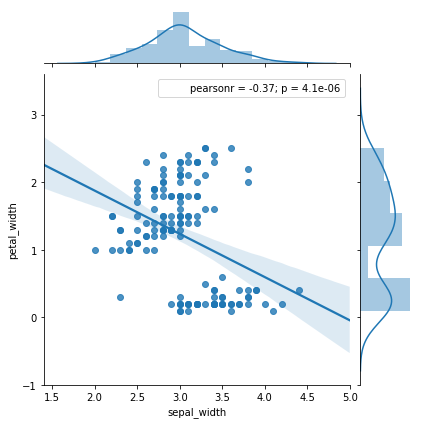

In [34]:
# H1b: 花萼寬度與花瓣寬度有顯著的正向關係
sns.jointplot(x = 'sepal_width', y = 'petal_width', data = data ,kind = 'reg')#畫迴歸線
model1b = ols('petal_width ~ sepal_width', data).fit() #採用普通最小平方法做簡單迴歸
print(model1b.summary())

### [小結論]: 在α=0.05下，我們有顯著的證據認為: 花萼寬度與花瓣寬度有顯著的反向關係。H1b不成立。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     299.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           2.33e-37
Time:                        21:51:40   Log-Likelihood:                -88.686
No. Observations:                 150   AIC:                             181.4
Df Residuals:                     148   BIC:                             187.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.2002      0.257    -12.458   

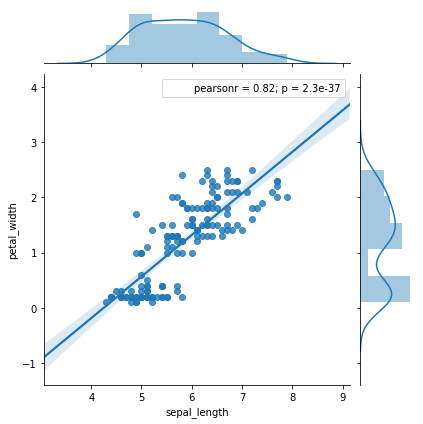

In [36]:
# H2a: 花萼長度與花瓣寬度有顯著的正向關係
sns.jointplot(x = 'sepal_length', y = 'petal_width', data = data ,kind = 'reg')#畫迴歸線
model1b = ols('petal_width ~ sepal_length', data).fit() #採用普通最小平方法做簡單迴歸
print(model1b.summary())

### [小結論]: 在α=0.05下，我們有顯著的證據認為: 花萼長度與花瓣寬度有顯著的正向關係。H2a成立。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           1.04e-47
Time:                        21:53:52   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.1014      0.507    -14.016   

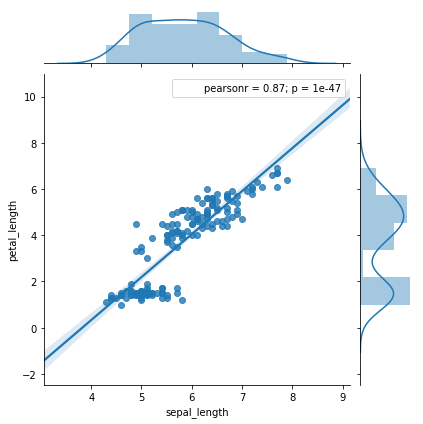

In [38]:
# H2b: 花萼寬度與花瓣長度有顯著的正向關係
sns.jointplot(x = 'sepal_length', y = 'petal_length', data = data ,kind = 'reg')#畫迴歸線
model1b = ols('petal_length ~ sepal_length', data).fit() #採用普通最小平方法做簡單迴歸
print(model1b.summary())


### [小結論]: 在α=0.05下，我們有顯著的證據認為: 花萼寬度與花瓣長度有顯著的正向關係。H2b成立。

## 2-2. 跟品種有關嗎?

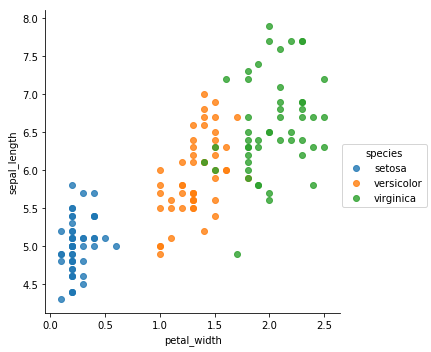

In [49]:
import seaborn as sns

sns.lmplot( x="petal_width", y="sepal_length", data=data, fit_reg=False, hue='species', legend=True)


#### 大致上，我們已經證明"花瓣長度與花瓣長度有顯著的正向關係"，接下來

### [我們想要知道跟品種有沒有關係]
- ### H2: 花萼寬度與花瓣長度及品種有顯著的正向關係


In [ ]:
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

資料來源:
https://wizardforcel.gitbooks.io/scipy-lecture-notes/content/14.html
https://python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn/